In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#import the dataset from csv file
df=pd.read_csv(r"D:\programming\coding\codsoft_dataset\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<BarContainer object of 3 artists>

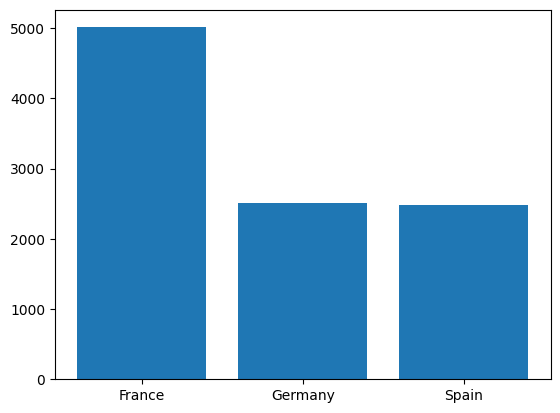

In [5]:
plt.bar(x=['France','Germany','Spain'],height=[5014,2509,2477])

<Axes: xlabel='Geography', ylabel='Balance'>

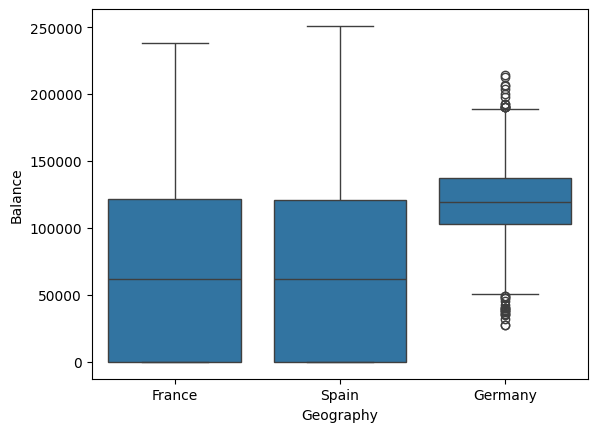

In [6]:
#average bank balance of people
sns.boxplot(y=df['Balance'],x=df['Geography'])

In [7]:
#check for any missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['Geography']=lr.fit_transform(df['Geography'])
df['Gender']=lr.fit_transform(df['Gender'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
print(np.unique(df['Surname']))
print(len(df['Surname']))

['Abazu' 'Abbie' 'Abbott' ... 'Zuev' 'Zuyev' 'Zuyeva']
10000


In [10]:
#removing the surname column as it does not have any correlation with the Exited column
df=df.drop('Surname',axis='columns')
df.head()


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.corr()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


In [12]:
#Removing the customer id column as it does not have  correlation with exited column 
df=df.drop('CustomerId',axis='columns')
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#RowNuber column wont affect the Exited columns
df=df.drop('RowNumber',axis='columns')

In [14]:
#splitting the data to independent and dependent variable
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [15]:
#now split the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


Logistic Regression Model

In [17]:
#train our logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)


LogisticRegression()

In [18]:
#predict the test set
y_pred_lr=lr_model.predict(x_test)

Evaluation of our model with training and test set

In [19]:

cm_lr=confusion_matrix(y_test,y_pred_lr)
ac_lr=accuracy_score(y_test,y_pred_lr)

Random Forest Classification Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rc_model=RandomForestClassifier()
rc_model.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
#predict the test set
y_pred_rc=rc_model.predict(x_test)

In [22]:

cm_rc=confusion_matrix(y_test,y_pred_rc)
ac_rc=accuracy_score(y_test,y_pred_rc)

K Nearest Neighbor Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred=knn_model.predict(x_test)

In [25]:
cm_knn=confusion_matrix(y_test,y_pred)
ac_knn=accuracy_score(y_test,y_pred)

metrics for both models

In [26]:
print("*"*100)
print("Arruracy score for logistic regression is:",ac_lr)
print("Confusion matrix for logistic regression is:\n",cm_lr)
print("*"*100)
print("Accuracy score for Random Forest classifier is:",ac_rc)
print("Confusion matrix for Random Forest classifier is:\n",cm_rc)
print("*"*100)
print("Accuracy score for kneighborsclassifier is:",ac_knn)
print('Confusion matrix for Kneighborsclassifier is:\n',cm_knn)
print("*"*100)

****************************************************************************************************
Arruracy score for logistic regression is: 0.8048
Confusion matrix for logistic regression is:
 [[1932   59]
 [ 429   80]]
****************************************************************************************************
Accuracy score for Random Forest classifier is: 0.8632
Confusion matrix for Random Forest classifier is:
 [[1903   88]
 [ 254  255]]
****************************************************************************************************
Accuracy score for kneighborsclassifier is: 0.8376
Confusion matrix for Kneighborsclassifier is:
 [[1874  117]
 [ 289  220]]
****************************************************************************************************
